### Àlex Correa Orri 1564967
### Júlia Pumares Benaiges 1566252

#### Dataset: https://www.kaggle.com/iabhishekofficial/mobile-price-classification

In [1]:
reset()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Don't know how to reset  (), please run `%reset?` for details


### MÒDULS I LLIBRERIES

In [2]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats
import os
import seaborn as sns
from scipy.stats import shapiro, spearmanr
import math
import sklearn
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import ipympl
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
%matplotlib widget
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')

### DIRECTORI DE TREBALL

In [3]:
os.getcwd()
path = 'C:/Users/alexc/OneDrive/Escritorio/UNI/3er/Aprenentatge Computacional/pràctiques/PRÀCTICA 2/Practica2-Classificacio'
os.chdir(path)
os.getcwd()
# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### LECTURA DE DADES

In [4]:
# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('train.csv')

dataset_test = load_dataset('test.csv')

### 1- EDA

In [5]:
dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.200,0,1,0,7,0.600,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.500,1,0,1,53,0.700,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.500,1,2,1,41,0.900,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.500,0,0,0,10,0.800,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.200,0,13,1,44,0.600,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.500,1,0,1,2,0.800,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.600,1,0,0,39,0.200,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.900,1,1,1,36,0.700,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.900,0,4,1,46,0.100,145,5,...,336,670,869,18,10,19,1,1,1,0


#### Atributs

In [6]:
dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

#### Determinem com l'atribut objectiu el price_range (4 rangs de preu)

In [7]:
data = dataset.values
l = len(dataset.columns)
X = data[:, :l]
y = data[:, l-1]

#### Correlacions amb l'atribut a predir (price_range)

In [8]:
i=0
cols_corr = []
for col in dataset.columns:
    s, p = spearmanr(X[:,i], y)
    if (abs(s) > 0.10 and p < 0.05):
    #if True:
        cols_corr.append(col)
        print(str(i) + "- " + col)
        print(spearmanr(X[:,i], y))
        print("-----------------------------------------------------------------------------------")
    i = i + 1

0- battery_power
SpearmanrResult(correlation=0.19999095450908858, pvalue=1.7223057044179651e-19)
-----------------------------------------------------------------------------------
11- px_height
SpearmanrResult(correlation=0.13188410283565175, pvalue=3.2150109040420085e-09)
-----------------------------------------------------------------------------------
12- px_width
SpearmanrResult(correlation=0.1651336945326619, pvalue=1.0740563666925509e-13)
-----------------------------------------------------------------------------------
13- ram
SpearmanrResult(correlation=0.9170797841496084, pvalue=0.0)
-----------------------------------------------------------------------------------
20- price_range
SpearmanrResult(correlation=1.0, pvalue=0.0)
-----------------------------------------------------------------------------------


In [9]:
X = data[:, :l-1]

In [10]:
X0 = X
y0 = y

#### Scatter plot dels atributs més correlacionats (ram i battery_power) amb price_range

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
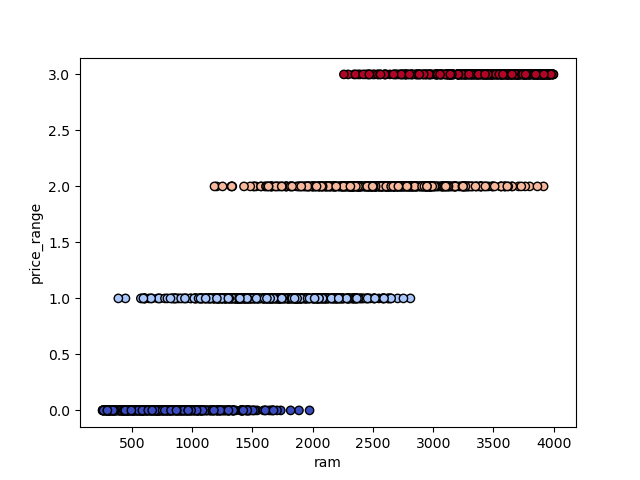

In [20]:
n_classes = 4
    
plt.figure()
plt.xlabel("ram")
plt.ylabel("price_range")
plt.scatter(X[:,13], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
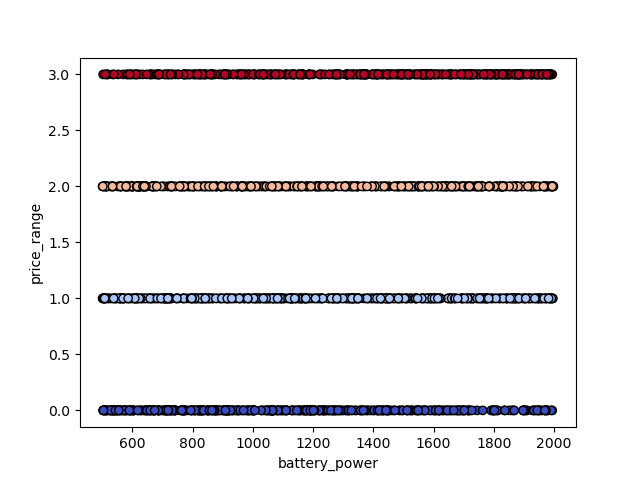

In [21]:
plt.figure()
plt.xlabel("battery_power")
plt.ylabel("price_range")
plt.scatter(X[:,0], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')

#### Dades amb distribució normal

In [22]:
data = dataset.values
l = len(dataset.columns)
X = data[:, :l]
y = data[:, l-1]

In [23]:
c = 0
for col in dataset.columns:
    stat, p = shapiro(X[:,c])
    if p > 0.05:
        print(c)
        print(p)
        print(dataset.columns[c])
        print('------------------------')
    c += 1
    
#no tenim dades amb distribució normal

#### Dades binàries

In [24]:
bool_cols = [col for col in dataset if np.isin(dataset[col].dropna().unique(), [0, 1]).all()]
bool_cols

['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

#### Les resta de dades són numèriques (enteres o decimals), no tenim categòriques

### 2- Preprocessing

#### Provem si val la pena tenir amplada i alçada o podem utilitzar la mida de la diagonal. Creem atribut nou, px_diag

In [25]:
dataset['px_diag'] = (dataset['px_height']**2+dataset['px_width']**2)**(1/2)
dataset = dataset.drop(['px_width','px_height'],axis=1)
data = dataset.values
l = len(dataset.columns)
X = data[:, :l]
y = data[:, dataset.columns.get_loc('price_range')]

In [26]:
i=0
cols_corr = []
for col in dataset.columns:
    s, p = spearmanr(X[:,i], y)
    if (abs(s) > 0.10 and p < 0.05):
    #if True:
        cols_corr.append(col)
        print(str(i) + "- " + col)
        print(spearmanr(X[:,i], y))
        print("-----------------------------------------------------------------------------------")
    i = i + 1

0- battery_power
SpearmanrResult(correlation=0.19999095450908858, pvalue=1.7223057044179651e-19)
-----------------------------------------------------------------------------------
11- ram
SpearmanrResult(correlation=0.9170797841496084, pvalue=0.0)
-----------------------------------------------------------------------------------
18- price_range
SpearmanrResult(correlation=1.0, pvalue=0.0)
-----------------------------------------------------------------------------------
19- px_diag
SpearmanrResult(correlation=0.17524012490562485, pvalue=2.9446410697169353e-15)
-----------------------------------------------------------------------------------


#### Creem dataset1 amb els atributs més correlacionats

In [27]:
dataset1 = dataset[cols_corr]
data1 = dataset1.values
l1 = len(dataset1.columns)
X1 = data1[:, :l1-1]
y1 = data1[:, dataset1.columns.get_loc('price_range')]

#### Normalitzar

In [28]:
def standarize(x_train):
    mean = x_train.mean(0)
    std = x_train.std(0)
    x_t = x_train - mean[None, :]
    x_t /= std[None, :]
    return x_t

In [29]:
Xn = standarize(X)
X1n = standarize(X1)

#### No tenim valors NaN

In [30]:
dataset.isnull().values.any()

False

#### Pairplot

In [31]:
dataset1

,battery_power,ram,price_range,px_diag
0,842,2549,1,756.265
1,1021,2631,2,2184.301
2,563,2603,2,2130.687
3,615,2769,2,2160.660
4,1821,1411,1,1711.201
...,...,...,...,...
1995,794,668,0,2250.641
1996,1965,2032,2,2167.591
1997,1911,3057,3,1848.472
1998,1512,869,0,749.531


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
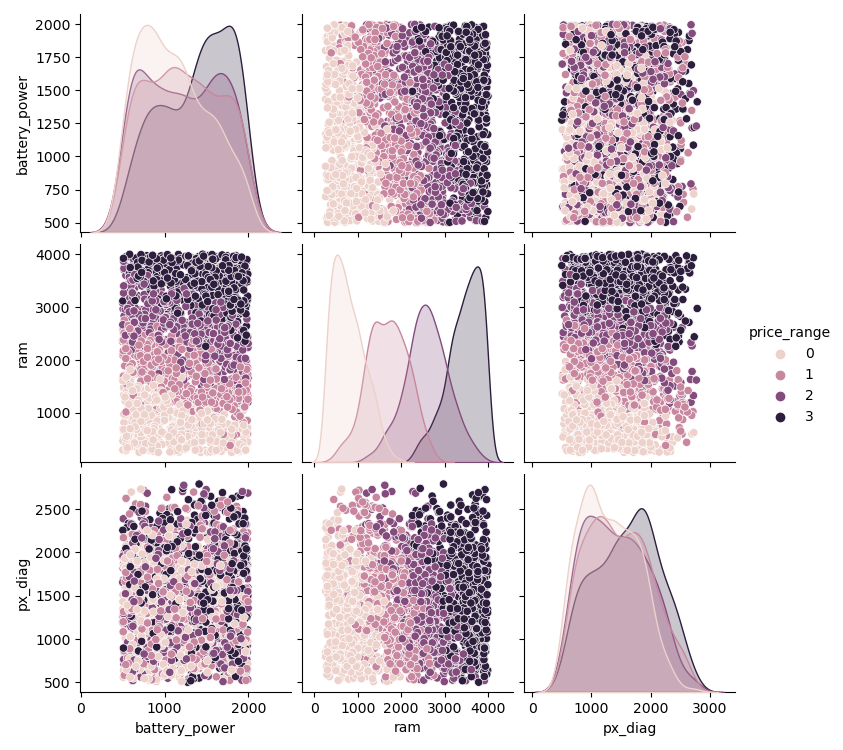

In [32]:
sns.pairplot(dataset1, hue='price_range')

### 3- Model Selection

#### Regressió logística i SVM amb tots els atributs

In [35]:
particions = [0.5, 0.7, 0.8]

for part in particions:
    print("PART: "+str(part)+" %")
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part, stratify=y)
    
    #Regresor logístic
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)
    logireg.fit(x_t, y_t)
    print ("Correct classification Logistic: ", logireg.score(x_v, y_v))
    
    #SVM
    svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True)
    svc.fit(x_t, y_t)
    probs = svc.predict_proba(x_v)
    print ("Correct classification SVM: ", svc.score(x_v, y_v))
    
    #DecisionTree
    clft = DecisionTreeClassifier(random_state=0, max_depth=2)
    clft.fit(x_t, y_t)
    print ("Correct classification Decision Tree: ", clft.score(x_v, y_v))
    
    #perceptron
    clf = Perceptron(tol=1e-3, random_state=0)
    clf.fit(x_t, y_t)
    print ("Correct classification Perceptron: ", clf.score(x_v, y_v))
    
    #KNeighbors
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(x_t, y_t)
    print ("Correct classification KNeighbors: ", neigh.score(x_v, y_v))
    
    bagging = BaggingClassifier(KNeighborsClassifier(n_neighbors=3), max_samples=0.5, max_features=0.5)
    bagging.fit(x_t, y_t)
    print ("Correct classification Bagging KNeighbors: ", bagging.score(x_v, y_v))
    
    adaB = AdaBoostClassifier(n_estimators=100)
    adaB.fit(x_t, y_t)
    print ("Correct classification AdaBoostClassifier: ", adaB.score(x_v, y_v))
    
    print("-------------------------------------------------------------------")

PART: 0.5 %
Correct classification Logistic:  0.634
Correct classification SVM:  0.25
Correct classification Decision Tree:  1.0
Correct classification Perceptron:  0.339
Correct classification KNeighbors:  0.915
Correct classification Bagging KNeighbors:  0.582
Correct classification AdaBoostClassifier:  0.75
-------------------------------------------------------------------
PART: 0.7 %
Correct classification Logistic:  0.615
Correct classification SVM:  0.25166666666666665
Correct classification Decision Tree:  1.0
Correct classification Perceptron:  0.425
Correct classification KNeighbors:  0.9333333333333333
Correct classification Bagging KNeighbors:  0.8366666666666667
Correct classification AdaBoostClassifier:  0.75
-------------------------------------------------------------------
PART: 0.8 %
Correct classification Logistic:  0.5625
Correct classification SVM:  0.2525
Correct classification Decision Tree:  1.0
Correct classification Perceptron:  0.4675
Correct classification K

#### Regressió logística i SVM amb els atributs més correlacionats

In [36]:
particions = [0.5, 0.7, 0.8]

for part in particions:
    print("PART: "+str(part)+" %")
    x_t, x_v, y_t, y_v = train_test_split(X1, y1, train_size=part, stratify=y)
    
    #Regresor logístic
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)
    logireg.fit(x_t, y_t)
    print ("Correct classification Logistic: ", logireg.score(x_v, y_v))
    
    #SVM
    svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True)
    svc.fit(x_t, y_t)
    probs = svc.predict_proba(x_v)
    print ("Correct classification SVM: ", svc.score(x_v, y_v))
    
    #DecisionTree
    clft = DecisionTreeClassifier(random_state=0, max_depth=2)
    clft.fit(x_t, y_t)
    print ("Correct classification Decision Tree: ", clft.score(x_v, y_v))
    
    #perceptron
    clf = Perceptron(tol=1e-3, random_state=0)
    clf.fit(x_t, y_t)
    print ("Correct classification Perceptron: ", clf.score(x_v, y_v))
    
    #KNeighbors
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(x_t, y_t)
    print ("Correct classification KNeighbors: ", neigh.score(x_v, y_v))
    
    bagging = BaggingClassifier(KNeighborsClassifier(n_neighbors=3), max_samples=0.5, max_features=0.5)
    bagging.fit(x_t, y_t)
    print ("Correct classification Bagging KNeighbors: ", bagging.score(x_v, y_v))

    adaB = AdaBoostClassifier(n_estimators=100)
    adaB.fit(x_t, y_t)
    print ("Correct classification AdaBoostClassifier: ", adaB.score(x_v, y_v))
    
    
    print("-------------------------------------------------------------------")

PART: 0.5 %
Correct classification Logistic:  0.99
Correct classification SVM:  0.253
Correct classification Decision Tree:  1.0
Correct classification Perceptron:  0.415
Correct classification KNeighbors:  0.793
Correct classification Bagging KNeighbors:  1.0
Correct classification AdaBoostClassifier:  0.75
-------------------------------------------------------------------
PART: 0.7 %
Correct classification Logistic:  0.9866666666666667
Correct classification SVM:  0.25333333333333335
Correct classification Decision Tree:  1.0
Correct classification Perceptron:  0.42333333333333334
Correct classification KNeighbors:  0.7633333333333333
Correct classification Bagging KNeighbors:  0.78
Correct classification AdaBoostClassifier:  0.75
-------------------------------------------------------------------
PART: 0.8 %
Correct classification Logistic:  0.9925
Correct classification SVM:  0.25
Correct classification Decision Tree:  1.0
Correct classification Perceptron:  0.41
Correct classific

#### Amb dades normalitzades (tots els atributs)

In [37]:
particions = [0.5, 0.7, 0.8]

for part in particions:
    print("PART: "+str(part)+" %")
    x_t, x_v, y_t, y_v = train_test_split(Xn, y, train_size=part, stratify=y)
    
    #Regresor logístic
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)
    logireg.fit(x_t, y_t)
    print ("Correct classification Logistic: ", logireg.score(x_v, y_v))
    
    #SVM
    svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True)
    svc.fit(x_t, y_t)
    probs = svc.predict_proba(x_v)
    print ("Correct classification SVM: ", svc.score(x_v, y_v))
    
    #DecisionTree
    clft = DecisionTreeClassifier(random_state=0, max_depth=2)
    clft.fit(x_t, y_t)
    print ("Correct classification Decision Tree: ", clft.score(x_v, y_v))
    
    #perceptron
    clf = Perceptron(tol=1e-3, random_state=0)
    clf.fit(x_t, y_t)
    print ("Correct classification Perceptron: ", clf.score(x_v, y_v))
    
    #KNeighbors
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(x_t, y_t)
    print ("Correct classification KNeighbors: ", neigh.score(x_v, y_v))
    
    bagging = BaggingClassifier(KNeighborsClassifier(n_neighbors=3), max_samples=0.5, max_features=0.5)
    bagging.fit(x_t, y_t)
    print ("Correct classification Bagging KNeighbors: ", bagging.score(x_v, y_v))

    adaB = AdaBoostClassifier(n_estimators=100)
    adaB.fit(x_t, y_t)
    print ("Correct classification AdaBoostClassifier: ", adaB.score(x_v, y_v))
    
    
    print("-------------------------------------------------------------------")

PART: 0.5 %
Correct classification Logistic:  1.0
Correct classification SVM:  0.393
Correct classification Decision Tree:  1.0
Correct classification Perceptron:  0.728
Correct classification KNeighbors:  0.579
Correct classification Bagging KNeighbors:  0.781
Correct classification AdaBoostClassifier:  0.75
-------------------------------------------------------------------
PART: 0.7 %
Correct classification Logistic:  1.0
Correct classification SVM:  0.41
Correct classification Decision Tree:  1.0
Correct classification Perceptron:  0.6733333333333333
Correct classification KNeighbors:  0.6366666666666667
Correct classification Bagging KNeighbors:  0.8966666666666666
Correct classification AdaBoostClassifier:  0.75
-------------------------------------------------------------------
PART: 0.8 %
Correct classification Logistic:  1.0
Correct classification SVM:  0.3525
Correct classification Decision Tree:  1.0
Correct classification Perceptron:  0.68
Correct classification KNeighbors:

#### Amb els atributs correlacionats i normalitzats

In [38]:
particions = [0.5, 0.7, 0.8]

for part in particions:
    print("PART: "+str(part)+" %")
    x_t, x_v, y_t, y_v = train_test_split(X1n, y, train_size=part, stratify=y)
    
    #Regresor logístic
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)
    logireg.fit(x_t, y_t)
    print ("Correct classification Logistic: ", logireg.score(x_v, y_v))
    
    #SVM
    svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True)
    svc.fit(x_t, y_t)
    probs = svc.predict_proba(x_v)
    print ("Correct classification SVM: ", svc.score(x_v, y_v))
    
    #DecisionTree
    clft = DecisionTreeClassifier(random_state=0, max_depth=2)
    clft.fit(x_t, y_t)
    print ("Correct classification Decision Tree: ", clft.score(x_v, y_v))
    
    #perceptron
    clf = Perceptron(tol=1e-3, random_state=0)
    clf.fit(x_t, y_t)
    print ("Correct classification Perceptron: ", clf.score(x_v, y_v))
    
    #KNeighbors
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(x_t, y_t)
    print ("Correct classification KNeighbors: ", neigh.score(x_v, y_v))
    
    bagging = BaggingClassifier(KNeighborsClassifier(n_neighbors=3), max_samples=0.5, max_features=0.5)
    bagging.fit(x_t, y_t)
    print ("Correct classification Bagging KNeighbors: ", bagging.score(x_v, y_v))

    adaB = AdaBoostClassifier(n_estimators=100)
    adaB.fit(x_t, y_t)
    print ("Correct classification AdaBoostClassifier: ", adaB.score(x_v, y_v))
    
    
    print("-------------------------------------------------------------------")

PART: 0.5 %
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  1.0
Correct classification Perceptron:  0.96
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  0.993
Correct classification AdaBoostClassifier:  0.75
-------------------------------------------------------------------
PART: 0.7 %
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  1.0
Correct classification Perceptron:  0.6116666666666667
Correct classification KNeighbors:  1.0
Correct classification Bagging KNeighbors:  0.8783333333333333
Correct classification AdaBoostClassifier:  0.75
-------------------------------------------------------------------
PART: 0.8 %
Correct classification Logistic:  1.0
Correct classification SVM:  1.0
Correct classification Decision Tree:  1.0
Correct classification Perceptron:  0.5775
Correct classification KNeighbors:  1.0
Correct classifi

### 4- Cross Validation

In [39]:
#sorted(sklearn.metrics.SCORERS.keys())

In [41]:
#Regresor logístic
logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)
scores = cross_val_score(logireg, X1, y, cv=10)
print ("Scores classification Logistic: ", scores)
print ("Scores Mean classification Logistic: ", scores.mean())
print ("Scores std classification Logistic: ", scores.std())

print("--------------------------------------------------------------------------")

neigh = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(neigh, X1, y, cv=10)
print ("Scores classification KNeighbors: ", scores)
print ("Scores Mean classification KNeighbors: ", scores.mean())
print ("Scores std classification KNeighbors: ", scores.std())

print("--------------------------------------------------------------------------")

bagging = BaggingClassifier(KNeighborsClassifier(n_neighbors=3), max_samples=0.5, max_features=0.5)
scores = cross_val_score(bagging, X1, y, cv=10)
print ("Scores classification Bagging KNeighbors: ", scores)
print ("Scores Mean classification Bagging KNeighbors: ", scores.mean())
print ("Scores std classification Bagging KNeighbors: ", scores.std())

Scores classification Logistic:  [1.    0.99  0.995 0.99  0.99  0.995 0.995 0.98  1.    0.995]
Scores Mean classification Logistic:  0.9929999999999998
Scores std classification Logistic:  0.0055677643628300275
--------------------------------------------------------------------------
Scores classification KNeighbors:  [0.785 0.8   0.75  0.805 0.815 0.75  0.765 0.78  0.76  0.785]
Scores Mean classification KNeighbors:  0.7795
Scores std classification KNeighbors:  0.021731313812100733
--------------------------------------------------------------------------
Scores classification Bagging KNeighbors:  [0.995 0.725 0.78  0.845 1.    0.91  0.815 0.78  0.945 1.   ]
Scores Mean classification Bagging KNeighbors:  0.8795
Scores std classification Bagging KNeighbors:  0.09829674460530216


In [42]:
##TODO leave one out https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html 